## Bank Marketing
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

#### Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
print(df.shape)

(45211, 17)


#### Understand the columns:
Features:
- age: age in years, Some ages may be more interested
- job: type of job, Some jobs may be more interested
- marital: marital status, Could influence financial behavior ?
- education: education levels, May relate to financial literacy. 
- default: has credit in default? Riskier clients?
- balance: average yearly balance, in euros, Some balance may be more interested
- housing: has housing loan?, Financial commitments
- loan: has personal loan?, Financial commitments
- contact: contact communication type, Maybe some channels convert better
- day: last contact day of the month 
- month: last contact month of year.
- duration: last contact duration, in seconds, longer calls = more yes (?)
- campaign: number of contacts performed during this campaign and for this client, Push too much = fatigue (?)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client.
- poutcome: outcome of the previous marketing campaign.

Target
- y - has the client subscribed a term deposit?, binary column

*The classification goal is to predict if the client will subscribe (yes/no) a term deposit*

#### Cleaning data

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df.duplicated().sum()

np.int64(0)

In [40]:
df['y'].value_counts(normalize=True) * 100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

In [41]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


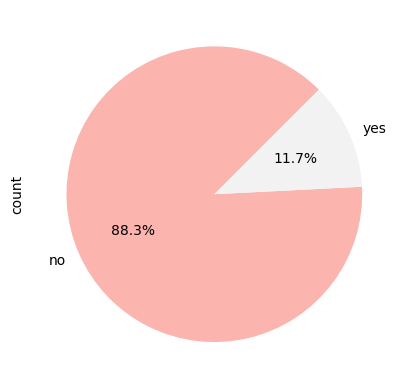

In [52]:
df['y'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=45, cmap="Pastel1")
plt.show()

In [10]:

df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [56]:
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18–30', '31–40', '41–50', '51–60', '60+'])

<Axes: xlabel='job', ylabel='proportion'>

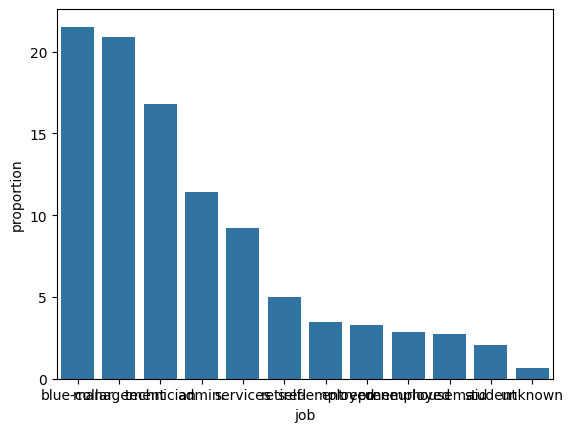

In [ ]:
sns.barplot(df['job'].value_counts(normalize=True)*100)


/tmp/ipykernel_8213/3817457248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yes_by_job.values, y=yes_by_job.index, palette="pastel")


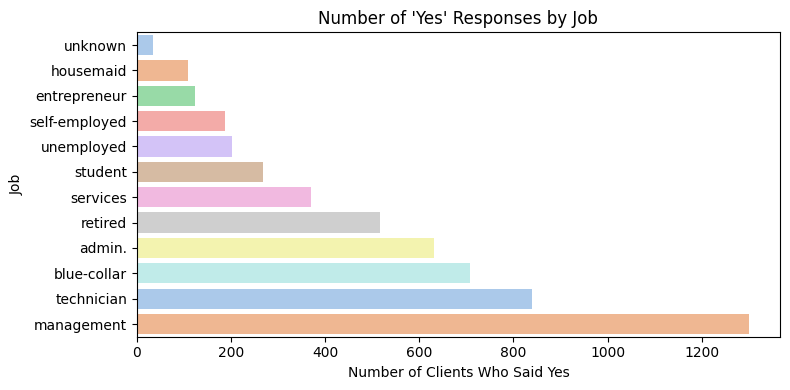

In [48]:
df_yes = df[df["y"] == "yes"]
yes_by_job = df_yes.groupby("job").size().sort_values()


plt.figure(figsize=(8, 4))
sns.barplot(x=yes_by_job.values, y=yes_by_job.index, palette="pastel")
plt.title("Number of 'Yes' Responses by Job")
plt.xlabel("Number of Clients Who Said Yes")
plt.ylabel("Job")
plt.tight_layout()
plt.show()

Which job types are more likely to say yes? 

How can we improve the success of our campaign?

<Axes: xlabel='education'>

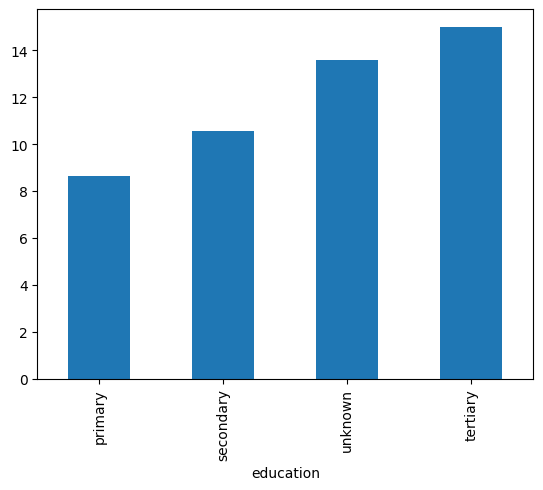

In [53]:
(df[df["y"] == "yes"].groupby("education").size() / 
 df.groupby("education").size() * 100).sort_values().plot(kind='bar')

In [55]:
(df[df["y"] == "yes"].groupby("job").size() / 
 df.groupby("job").size() * 100).sort_values()

job
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
services          8.883004
technician       11.056996
unknown          11.805556
self-employed    11.842939
admin.           12.202669
management       13.755551
unemployed       15.502686
retired          22.791519
student          28.678038
dtype: float64

In [61]:
(df[df["y"] == "yes"].groupby("age_group").size() / 
 df.groupby("age_group").size() * 100).sort_values()

/tmp/ipykernel_8213/242847118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df[df["y"] == "yes"].groupby("age_group").size() /
/tmp/ipykernel_8213/242847118.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group").size() * 100).sort_values()


age_group
41–50     9.066643
51–60    10.053304
31–40    10.244813
18–30    16.215446
60+      42.255892
dtype: float64

<Axes: xlabel='campaign'>

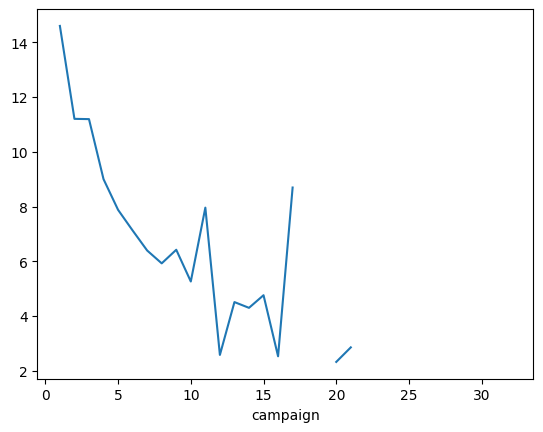

In [68]:
(df[df['y'] == 'yes'].groupby('campaign').size()/df.groupby('campaign').size()*100).plot()

<Axes: xlabel='duration', ylabel='Count'>

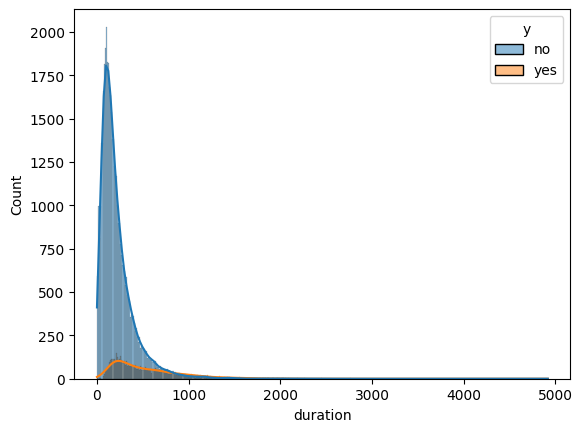

In [31]:
sns.histplot(data=df, x="duration", hue="y", kde=True)

<Axes: xlabel='age', ylabel='Count'>

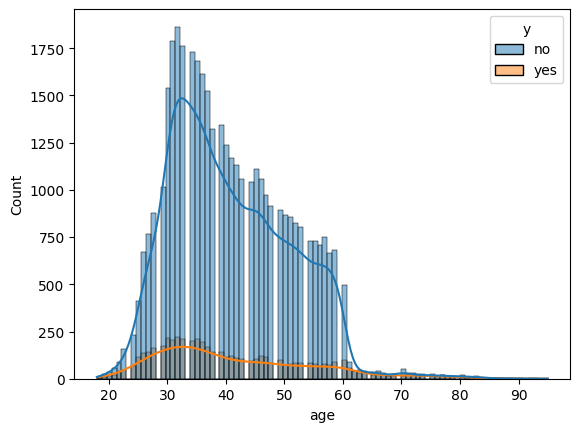

In [32]:
sns.histplot(data=df, x="age", hue="y", kde=True)

<Axes: >

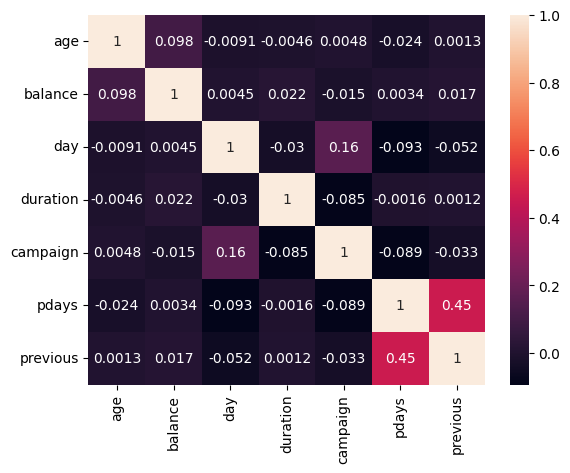

In [34]:
df_numeric = df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), annot=True)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop("y", axis=1)
y = df["y"].map({"yes": 1, "no": 0})

# Encode categorical columns before this step
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.62      0.32      0.42      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564

